In [1]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import *
from datetime import datetime
import json

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("sparkSQL exercise") \
            .getOrCreate()

sc = spark.sparkContext 

In [2]:
def apply_json(input_lst):
    try:
        return json.loads(input_lst)['animals'][0]                                                  
    except:
        return None 

In [18]:
data_filepath = '../data/json/api_dump_2020-06.json'

data = sc.textFile(data_filepath).map(apply_json) #reads in the json file

In [19]:
df = spark.read.json(data_filepath, multiLine = True)

In [20]:
df.count()

20

In [21]:
df.printSchema()

root
 |-- _links: struct (nullable = true)
 |    |-- organization: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- type: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- age: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- declawed: string (nullable = true)
 |    |-- house_trained: boolean (nullable = true)
 |    |-- shots_current: boolean (nullable = true)
 |    |-- spayed_neutered: boolean (nullable = true)
 |    |-- special_needs: boolean (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- coat: string (nullable = true)
 |-- colors: struct (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: strin

In [22]:
df_new = df.select('id', 'age', 'gender', 'primary_photo_cropped', 'status', 'status_changed_at', 'description')

In [23]:
dropped_df = df_new.na.drop()

In [24]:
dropped_df.show()

+--------+------+------+---------------------+---------+--------------------+--------------------+
|      id|   age|gender|primary_photo_cropped|   status|   status_changed_at|         description|
+--------+------+------+---------------------+---------+--------------------+--------------------+
|48504802|  Baby|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:28:...|This puppy is sch...|
|48504799|  Baby|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:19:...|Meet cute baby Ji...|
|48504797|Senior|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:15:...|Primary Color: Br...|
|48504796| Young|  Male| [https://dl5zpyw5...|adoptable|2020-07-16T08:07:...|All of our dogs a...|
+--------+------+------+---------------------+---------+--------------------+--------------------+



In [25]:
dropped_df.printSchema()

root
 |-- id: long (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- primary_photo_cropped: struct (nullable = true)
 |    |-- full: string (nullable = true)
 |    |-- large: string (nullable = true)
 |    |-- medium: string (nullable = true)
 |    |-- small: string (nullable = true)
 |-- status: string (nullable = true)
 |-- status_changed_at: string (nullable = true)
 |-- description: string (nullable = true)



In [26]:
dropped_df.createOrReplaceTempView("dog_data")

In [27]:
result = spark.sql('''SELECT gender,   
                        COUNT(*) AS Number
                        FROM dog_data
                        GROUP BY gender
                        ORDER BY COUNT(*) desc''')
result.show(20)

+------+------+
|gender|Number|
+------+------+
|  Male|     4|
+------+------+



In [28]:
result.head()

Row(gender='Male', Number=4)

In [14]:
plot_gender = result.toPandas()
plot_gender['gender']
plot_gender.dropna(inplace=True)

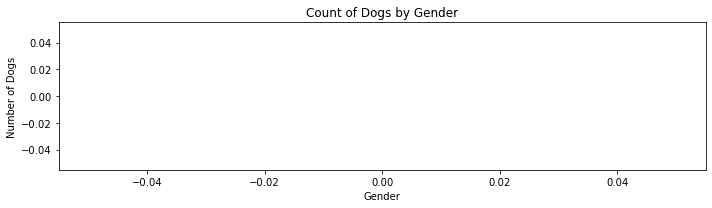

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10,3))
ax.bar(x = plot_gender['gender'], height=plot_gender['Number'])
ax.set_title("Count of Dogs by Gender")

ax.set_xlabel('Gender')
ax.set_ylabel('Number of Dogs')
plt.tight_layout()
plt.show()

TypeError: 'type' object is not iterable